<a href="https://colab.research.google.com/github/Harish-cathrish/Demo-project/blob/main/Bigmart_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title: Sales Analysis and Forecasting for BigMart Using Machine Learning**

Project Overview: BigMart, a leading retail chain, aims to leverage machine learning to enhance its sales analysis and forecasting capabilities. This project will develop a predictive model to analyze historical sales data, identify key trends, and forecast future sales. The insights gained will help BigMart optimize inventory management, tailor marketing strategies, and improve overall business performance.

**Tools and Technologies:**

Programming Languages: Python, R Libraries and Frameworks: Pandas, NumPy, Scikit-Learn, TensorFlow/Keras, StatsModels, Matplotlib, Seaborn Data Visualization: Tableau, Power BI, or custom web-based dashboards Deployment: Flask/Django for web deployment or integration with existing BI tools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#mounting of drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
#importing the required libraries for the Analysis of the project.


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')
# Read the 'Train.csv' file into a pandas DataFrame called 'train'


In [ ]:
test=pd.read_csv('/content/drive/MyDrive/Datasets/test.csv')
# Read the 'Test.csv' file into a pandas DataFrame called 'test'

Data structure and content

In [ ]:
train.shape
# shape function Helps us identify how many rows and columns we have acoording to our data set

(8523, 12)

In [ ]:
train.columns
# Display the column names of the 'train' DataFrame

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
train.isnull().sum()
# Calculate and display the number of missing values in each column of the 'train' DataFrame

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
train.dtypes
# Display the data types of each column in the 'train' DataFrame

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
train.duplicated()
# Check for duplicate rows in the 'train' DataFrame

,0
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,False


In [ ]:
train.info()
# Display a concise summary of the 'train' DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train.describe()
# Display a describe summary of the 'train' DataFrame

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
train.head()
# Display the first  rows of the 'train' DataFrame

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train['Item_Type'].value_counts()
# Count the occurrences of each unique value in the 'Item_Type' column of the 'test' DataFrame

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [ ]:
train['Item_Fat_Content'].value_counts()
# Count the occurrences of each unique value in the 'Item_Fat_Content' column of the 'test' DataFrame

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
test.shape
# shape function Helps us identify how many rows and columns we have acoording to our data set.

(5681, 11)

In [ ]:
test.columns
# display coloumn names


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
test.isnull().sum()
#display number of missing values of each column

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [ ]:
test.dtypes
#display the data type of each column

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
test.duplicated()
#check for duplicated rows

,0
0,False
1,False
2,False
3,False
4,False
...,...
5676,False
5677,False
5678,False
5679,False


In [ ]:
test.info()
#display information about the datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
test.describe()
#display discriptive statistics

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [ ]:
test.head()
#display first few rows of the datasets

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
test['Item_Type'].value_counts()
#display value counts for 'Item_Type'

,count
Item_Type,
Snack Foods,789
Fruits and Vegetables,781
Household,638
Frozen Foods,570
Dairy,454
Baking Goods,438
Canned,435
Health and Hygiene,338
Meat,311


#Data Preprocessing

In [ ]:
test['Item_Fat_Content'].value_counts()
#display value counts for 'Item_Fat_Content'

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


DATA STRUCTURE AND CONTENT

In [ ]:
train['Item_Fat_Content'].value_counts()
#display value counts for 'Item_Fat_Content'


,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
train['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
# replace inconsistent values in 'Item_Fat_Content'


In [ ]:
train['Item_Fat_Content'].value_counts()
#display updated value counts for 'Item_Fat_Content'

,count
Item_Fat_Content,
Low Fat,5089
Regular,3006
Low Fat,316
low fat,112


In [ ]:
test['Item_Fat_Content'].value_counts()
#display value counts for 'Item_Fat_Content'


,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


In [ ]:
test['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
# replace inconsistent values in 'Item_Fat_Content'



In [ ]:
test['Item_Fat_Content'].value_counts()
#display updated value counts for 'Item_Fat_Content'

,count
Item_Fat_Content,
Low Fat,3396
Regular,2013
Low Fat,206
low fat,66


# Explaratory Analysis

Uni variate Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

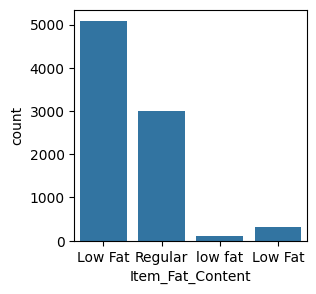

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x='Item_Fat_Content',data=train)
plt.xlabel('Item_Fat_Content')
plt.show()
# A countplot is a type of data visualization used in python.
# It is particularly useful for visualising the count occurences of each unique value.
# The sns.countplot function is used to create the count plot.
# The items have more low fat content and moderate regular fat content.


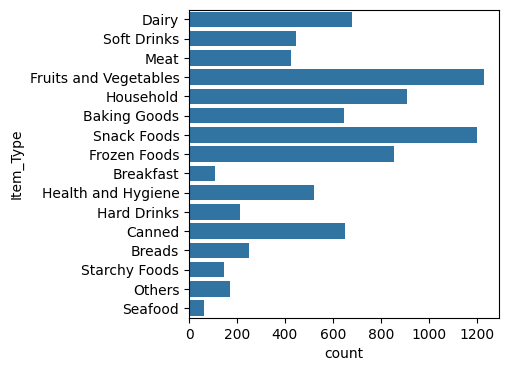

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(y='Item_Type',data=train)
plt.ylabel('Item_Type')
plt.show()
# Plot the frequency distribution of 'Item_Type' with a 4x4 inch figure size

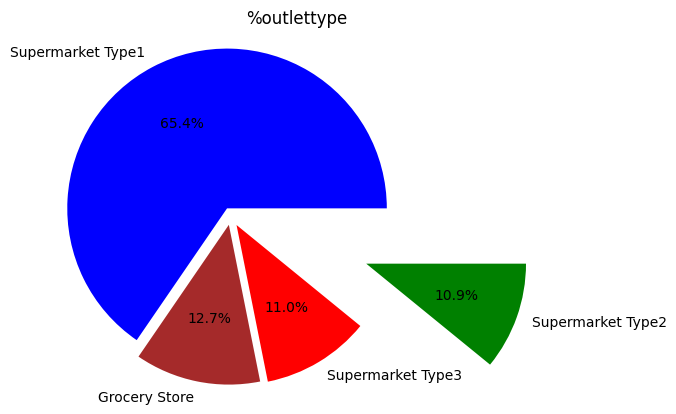

In [ ]:
outlettype=train['Outlet_Type'].value_counts(normalize=True)*100
explode=(0.05,0.06,0.07,0.9)
colors=('blue','brown','red','green')
plt.pie(outlettype,labels=outlettype.index,autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('%outlettype')
plt.axis('equal')
plt.show()
# Create a pie chart showing the percentage distribution colors, explode, and title

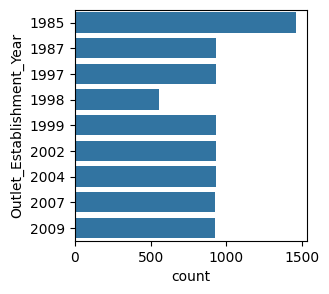

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(y='Outlet_Establishment_Year',data=train)
plt.ylabel('Outlet_Establishment_Year')
plt.show()
#Plot the frequency distribution of 'Outlet_Establishment_Year' with a 5x5

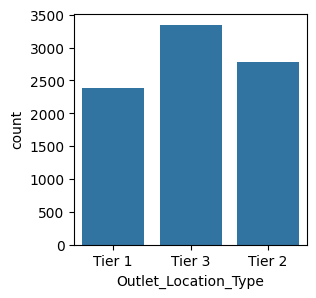

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x='Outlet_Location_Type',data=train)
plt.xlabel('Outlet_Location_Type')
plt.show()
# Plot the frequency distribution of 'Outlet_Location _Type'' with a 3x3 inch figure size

# To Handle the Missing and Catagorical Values

In [ ]:
# To handle the Missing and null values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


In [ ]:
le=LabelEncoder()
for col in train.columns:
  if train[col].dtype=='object':
    train[col]=le.fit_transform(train[col])
    # Coverting the labels into a numeric form using Label Encoder for the TRAIN SET.


In [ ]:
train['Outlet_Size'].dtypes
 #display the data type of 'Outlet_Size' column

dtype('int64')

In [ ]:
train.head()
#display updated few rows of the datasets


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
imputer=SimpleImputer(strategy='mean')
missing_coloums=['Item_Weight','Outlet_Size']
train[missing_coloums]=imputer.fit_transform(train[missing_coloums])

#the simple imputer multiply to the strategy and to find the columns and size of the outletsize & outletcolumns

In [ ]:
train.isnull().sum()
# Count the number of missing values in each column of the 'train' DataFrame

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
le=LabelEncoder()
for col in test.columns:
   if test[col].dtype=='object':
     test[col]=le.fit_transform(test[col])
     #Coverting the labels into a numeric form using Label Encoder for the TEST SET.

In [ ]:
test['Outlet_Size'].dtypes
 #display the data type of 'Outlet_Size' column

dtype('int64')

In [ ]:
test.head()
#display updated few rows of the datasetsv

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,2,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600,0,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315,0,0.015388,13,155.0340,2,2007,3,1,1
4,1184,NaN,2,0.118599,4,234.2300,5,1985,1,2,3


In [ ]:
imputer=SimpleImputer(strategy='mean')
missing_coloums=['Item_Weight','Outlet_Size']
test[missing_coloums]=imputer.fit_transform(test[missing_coloums])
# Impute missing values in 'Item_Weight' and 'Outlet_Size' columns of the 'test' DataFrame using the mean strategy


In [ ]:
imputer=SimpleImputer(strategy='mean')


In [ ]:
cols_with_missing=["Item_Weight",'Outlet_Size']

In [ ]:
train[cols_with_missing]=imputer.fit_transform(train[cols_with_missing])


In [ ]:
test.isnull().sum()
# Count the number of missing values in each column of the 'test' DataFrame

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


# Handling the Outliers

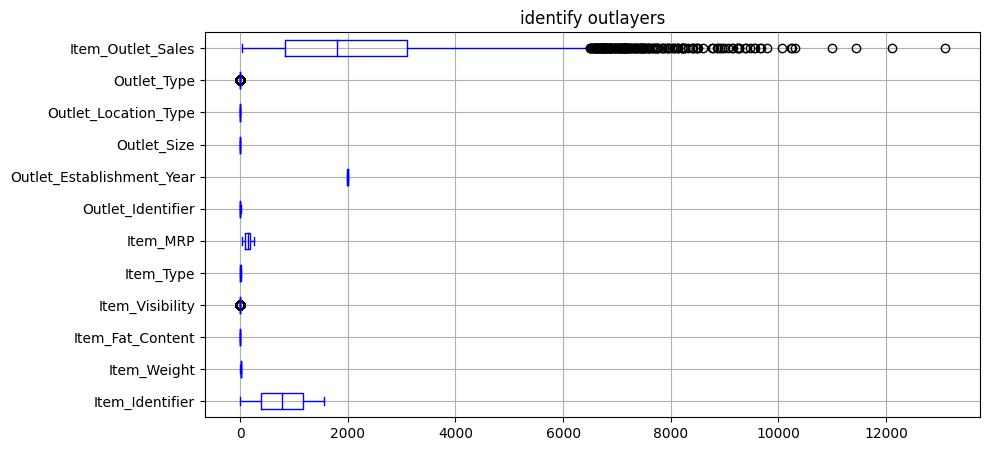

In [ ]:
number_coloumns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_coloumns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outlayers')
plt.show()
# Create a horizontal boxplot of numeric columns in the 'train' DataFrame to visually identify potential outliers

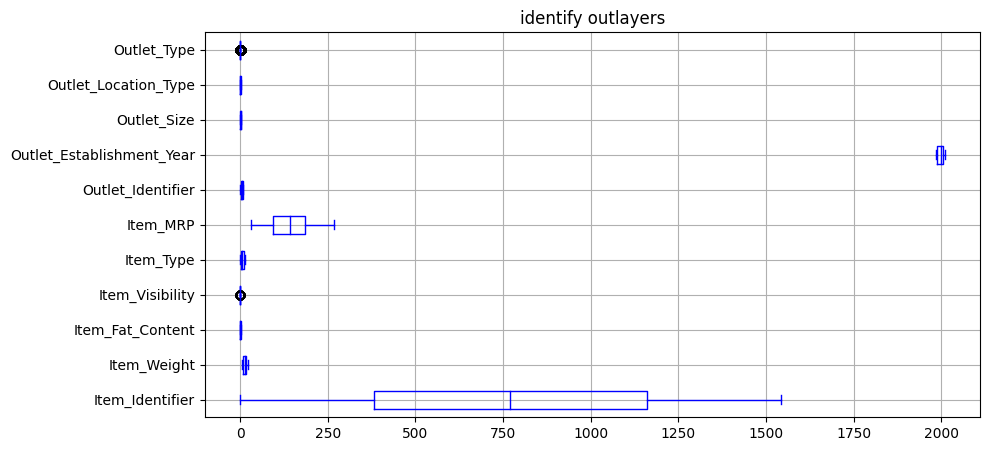

In [ ]:
number_coloumns=test.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_coloumns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outlayers')
plt.show()
# Create a horizontal boxplot of numeric columns in the 'test' DataFrame to visually identify potential outliers

In [ ]:
q1=np.percentile(train['Item_Outlet_Sales'],25)
q3=np.percentile(train['Item_Outlet_Sales'],75)
iqr=q3-q1
print('q1',q1)
print('q3',q3)
print('IQR',iqr)
# Calculate and print the first quartile (Q1), third quartile (Q3), and the interquartile range (IQR) of 'Item_Outlet_Sales' in the 'train' DataFrame

q1 834.2474
q3 3101.2964
IQR 2267.049


In [ ]:
upperlimit=q3+1.5*iqr
lowerlimit=q1-1.5*iqr
print('upperlimit',upperlimit)
print('lowerlimit',lowerlimit)
# Calculate and print the upper and lower limits for detecting outliers using the 1.5*IQR rule


upperlimit 6501.8699
lowerlimit -2566.3261


# Cube Tranformation

In [ ]:
train['Outlet_Sales_Square']=np.cbrt(train['Item_Outlet_Sales'])
# Computes the cube root of the sales data.


In [ ]:
train['Outlet_Sales_Cube']=np.cbrt(train['Item_Outlet_Sales'])

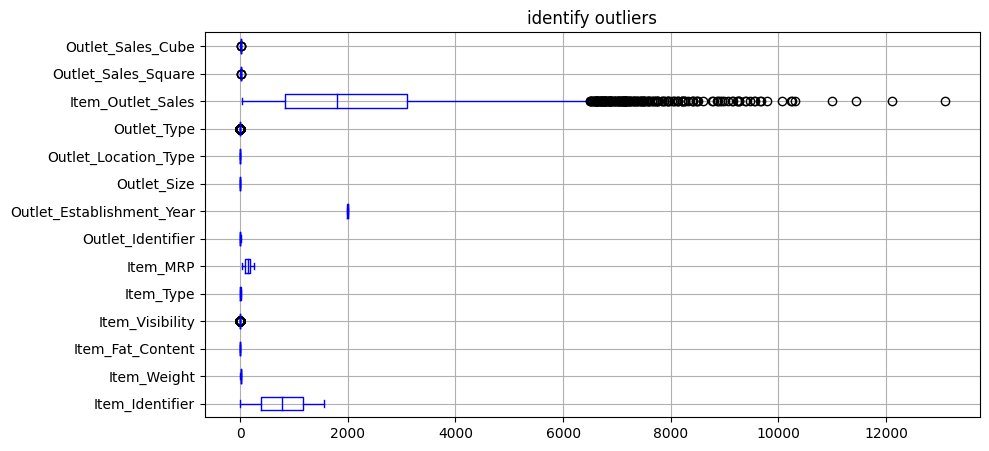

In [ ]:
number_columns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_columns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outliers')
plt.show()
# Selects numerical columns from the DataFrame and plots a horizontal boxplot to help identify outliers.

Bi variate Analysis

<ipython-input-418-0a98e676da50>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['Item_Outlet_Sales'],kde=True,rug=True)


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

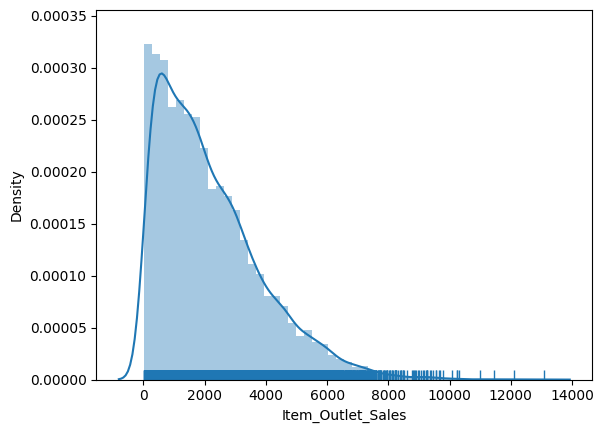

In [ ]:
sns.distplot(a=train['Item_Outlet_Sales'],kde=True,rug=True)
# Plots a distribution plot of 'Item_Outlet_Sales' with a kernel density estimate (KDE) and rug plot for visualization.


<ipython-input-419-a715797dc48d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['Outlet_Sales_Cube'],kde=True,rug=True)


<Axes: xlabel='Outlet_Sales_Cube', ylabel='Density'>

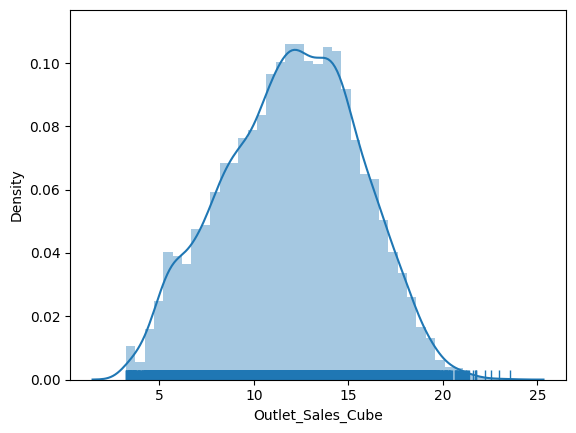

In [ ]:
sns.distplot(a=train['Outlet_Sales_Cube'],kde=True,rug=True)
#a=train['Outlet_Sales_square']: Specifies the data to be plotted, which in this case is the Outlet_Sales_square column from the train DataFrame.
#kde=True: Adds a Kernel Density Estimate (KDE) line to the plot, which represents the probability density function of the data.
#rug=True: Adds small vertical lines at the bottom of the plot for each data point, giving a sense of the distribution of individual data points.

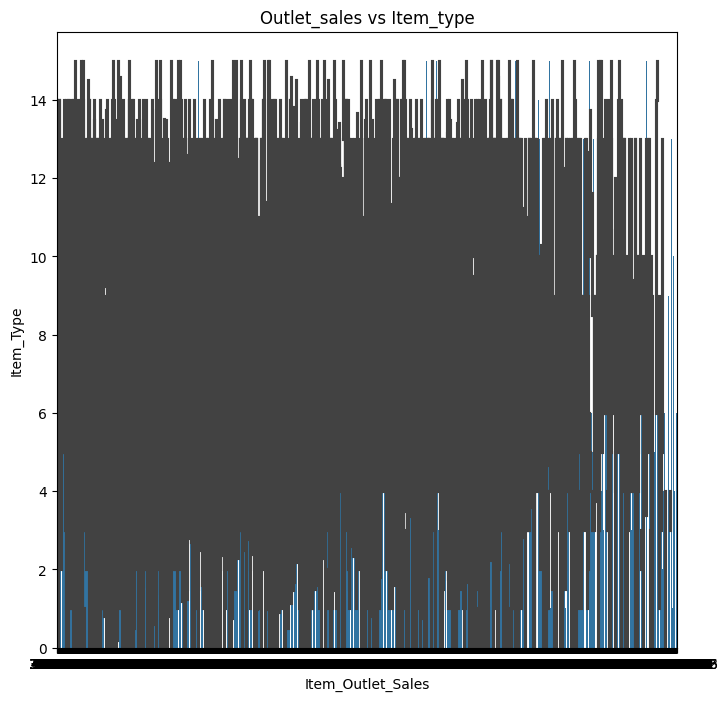

In [ ]:
# Set the size of the figure
plt.figure(figsize=(8,8))

# Create a bar plot with 'Item_Outlet_Sales' on the x-axis and 'Item_Type' on the y-axis
sns.barplot(x='Item_Outlet_Sales', y='Item_Type', data=train).set(title='Outlet_sales vs Item_type')

# Set the labels for the x and y axes
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Item_Type')

# Display the plot
plt.show()

Text(99.5815972222222, 0.5, 'Features')

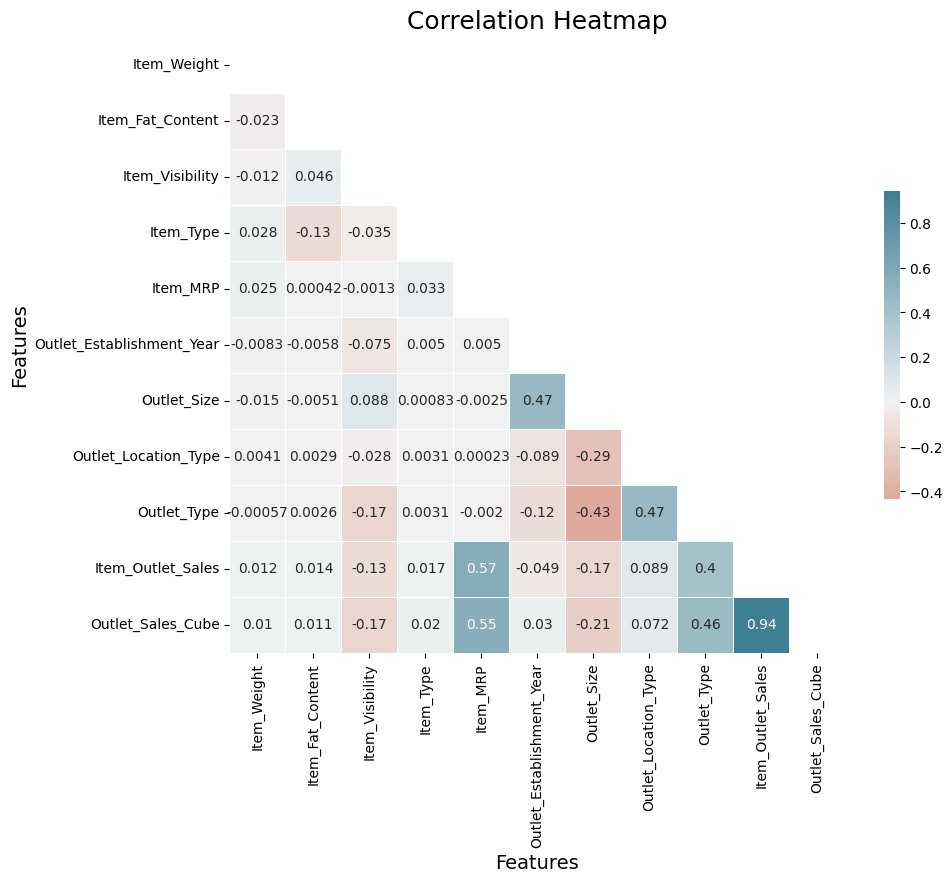

In [ ]:
# Subset the dataset to include only the relevant columns
subset=train[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales','Outlet_Sales_Cube']]
# Calculate the correlation matrix
corr=subset.corr()
# Create a mask for the upper triangle of the heatmap
mask=np.triu(np.ones_like(corr,dtype=bool))
# Set up the figure and axis objects
fig,ax=plt.subplots(figsize=(10,8))
# Generate the heatmap with green and white colors
sns.heatmap(corr,mask=mask,annot=True,cmap=sns.diverging_palette(20,220,n=200), center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})
# Set the title and labels for the plot
ax.set_title("Correlation Heatmap",fontsize=18)
ax.set_xlabel("Features",fontsize=14)
ax.set_ylabel("Features",fontsize=14)
# Show the plot plt.show()

Text(99.5815972222222, 0.5, 'Features')

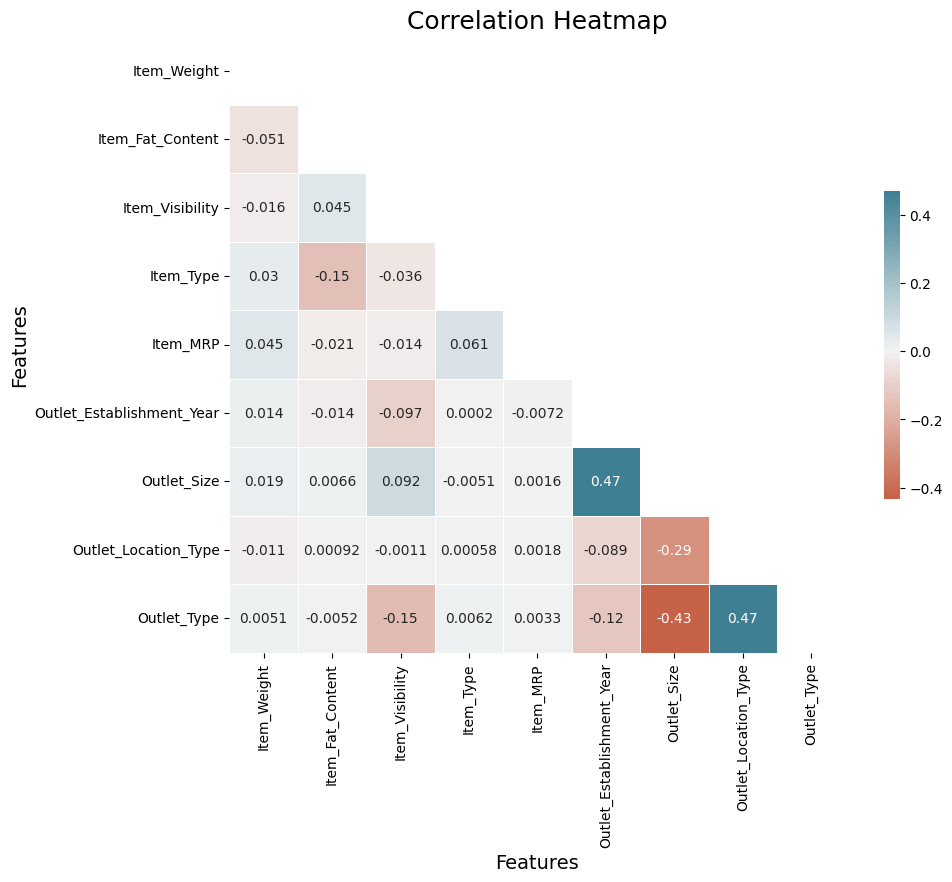

In [ ]:
# Subset the dataset to include only the relevant columns
subset=test[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
# Calculate the correlation matrix
corr=subset.corr()
# Create a mask for the upper triangle of the heatmap
mask=np.triu(np.ones_like(corr,dtype=bool))
# Set up the figure and axis objects
fig,ax=plt.subplots(figsize=(10,8))
# Generate the heatmap with green and white colors
sns.heatmap(corr,mask=mask,annot=True,cmap=sns.diverging_palette(20,220,n=200), center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})
# Set the title and labels for the plot
ax.set_title("Correlation Heatmap",fontsize=18)
ax.set_xlabel("Features",fontsize=14)
ax.set_ylabel("Features",fontsize=14)
# Show the plot plt.show()

# Feature Engineering

In [ ]:
train.head()
# Display the first five rows of the 'train' DataFrame


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Sales_Square,Outlet_Sales_Cube
0,156,9.30,0,0.016047,4,249.8092,9,1999,1.0,0,1,3735.1380,15.515611,15.515611
1,8,5.92,2,0.019278,14,48.2692,3,2009,1.0,2,2,443.4228,7.625576,7.625576
2,662,17.50,0,0.016760,10,141.6180,9,1999,1.0,0,1,2097.2700,12.800240,12.800240
3,1121,19.20,2,0.000000,6,182.0950,0,1998,3.0,2,0,732.3800,9.013888,9.013888
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0.0,2,1,994.7052,9.982319,9.982319


In [ ]:
train['Outlet_Age']=train['Outlet_Establishment_Year'].apply(lambda year: 2024-year)
# Calculate the age of each outlet by subtracting the establishment year from 2024
# and add it as a new column 'Outlet_Age' to the DataFrame


In [ ]:
train.head()
# Display the first five rows of the 'train' DataFrame

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Sales_Square,Outlet_Sales_Cube,Outlet_Age
0,156,9.30,0,0.016047,4,249.8092,9,1999,1.0,0,1,3735.1380,15.515611,15.515611,25
1,8,5.92,2,0.019278,14,48.2692,3,2009,1.0,2,2,443.4228,7.625576,7.625576,15
2,662,17.50,0,0.016760,10,141.6180,9,1999,1.0,0,1,2097.2700,12.800240,12.800240,25
3,1121,19.20,2,0.000000,6,182.0950,0,1998,3.0,2,0,732.3800,9.013888,9.013888,26
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0.0,2,1,994.7052,9.982319,9.982319,37


In [ ]:
train=train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales','Outlet_Size','Item_Weight'],axis=1)
# These columns are dropped as they are not necessary for the analysis or modeling

In [ ]:
train=train.drop(['Item_Visibility','Outlet_Sales_Square'],axis=1)
# Drop the 'Item_Visibility' and 'Item_Outlet_Sales' columns from the 'train' DataFrame
# These columns are removed as they are not required for the current analysis or modeling

In [ ]:
train.head()
# Display the first five rows of the 'train' DataFrame

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Outlet_Sales_Cube,Outlet_Age
0,0,4,249.8092,0,1,15.515611,25
1,2,14,48.2692,2,2,7.625576,15
2,0,10,141.6180,0,1,12.800240,25
3,2,6,182.0950,2,0,9.013888,26
4,0,9,53.8614,2,1,9.982319,37


In [ ]:
test.head()
# Display the first 5 rows of the DataFrame

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1.0,0,1
1,1067,8.300000,2,0.038428,4,87.3198,2,2007,3.0,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,3.0,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,3.0,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1.0,2,3


In [ ]:
test['Outlet_Age']=test['Outlet_Establishment_Year'].apply(lambda year: 2024-year)
#adding a new column to test data called Outlet_Age, which calculates the age of each outlet based on the establishment year.



In [ ]:
test.head()
# Display the first 5 rows of the DataFrame

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1.0,0,1,25
1,1067,8.300000,2,0.038428,4,87.3198,2,2007,3.0,1,1,17
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,3.0,2,0,26
3,809,7.315000,0,0.015388,13,155.0340,2,2007,3.0,1,1,17
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1.0,2,3,39


In [ ]:
test=test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Item_Weight'],axis=1)
#Removing unnecessary columns from test that are not needed for your analysis or modeling.

In [ ]:
test=test.drop(['Item_Visibility'],axis=1)

In [ ]:
test.head()
# Display the first 5 rows of the DataFrame

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,0,13,107.8622,0,1,25
1,2,4,87.3198,1,1,17
2,0,11,241.7538,2,0,26
3,0,13,155.0340,1,1,17
4,2,4,234.2300,2,3,39


In [ ]:
from sklearn.preprocessing import StandardScaler
#Initialize the scaler

In [ ]:
x=train[['Item_Fat_Content','Item_Type','Item_MRP','Outlet_Location_Type','Outlet_Type','Outlet_Age']]
y=train['Outlet_Sales_Cube']
# set feature matrix X and target vector y for a machine learning model.

In [ ]:
scaler=StandardScaler()
#Initialize the scaler

In [ ]:
x=scaler.fit_transform(x)
# Fit and transform the training data

In [ ]:
x=pd.DataFrame(x)
# Convert x to DataFrame if it is not already one

In [ ]:
x.head()
# Check the DataFrame

,0,1,2,3,4,5
0,-0.800189,-0.766479,1.747454,-1.369334,-0.252658,-0.139541
1,1.246633,1.608963,-1.489023,1.091569,1.002972,-1.334103
2,-0.800189,0.658786,0.010040,-1.369334,-0.252658,-0.139541
3,1.246633,-0.291391,0.660050,1.091569,-1.508289,-0.020085
4,-0.800189,0.421242,-1.399220,1.091569,-0.252658,1.293934


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X=test[['Item_Fat_Content','Item_Type','Item_MRP','Outlet_Location_Type','Outlet_Type','Outlet_Age']]
# set feature matrix X for machine learning model

In [ ]:
scaler=StandardScaler()

In [ ]:
X=scaler.fit_transform(x)
# Fit and transform the training data

In [ ]:
X=pd.DataFrame(x)
# Convert x to DataFrame if it is not already one

In [ ]:
x.head()
#Display the first five rows of the data sets

,0,1,2,3,4,5
0,-0.800189,-0.766479,1.747454,-1.369334,-0.252658,-0.139541
1,1.246633,1.608963,-1.489023,1.091569,1.002972,-1.334103
2,-0.800189,0.658786,0.010040,-1.369334,-0.252658,-0.139541
3,1.246633,-0.291391,0.660050,1.091569,-1.508289,-0.020085
4,-0.800189,0.421242,-1.399220,1.091569,-0.252658,1.293934


Model Building

In [ ]:
from sklearn.linear_model import LinearRegression
# For evaluating the models using the metrics
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection  import cross_val_score as CVS

In [ ]:
# Define the linear regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X, y)

# Precting the model using the test set
y_predict = lr.predict(X)

# Evaluating the training set with the metric values

print("R-Square value on the training set: = ", lr.score(x,y))
print("----------------------------------------------------------------------------------------------")

# Use cross-validation to get the R-squared score
scores = CVS(lr, X, y, cv=5)
print('CV R-squared scores:', scores,"\n")
print('Average CV R-squared score:', np.mean(scores),"\n")

R-Square value on the training set: =  0.5479097364091416
----------------------------------------------------------------------------------------------
CV R-squared scores: [0.55718226 0.56278476 0.52767074 0.53780645 0.54751477] 

Average CV R-squared score: 0.5465917953164335 



In [ ]:
import pickle
# Import the pickle module for serializing and deserializing Python objects

In [ ]:
Bigmart= "BigMart_Analysis.sav"
# Define the filename for saving the model
pickle.dump(lr, open(Bigmart,'wb'))
# Serialize the trained model 'lr' and save it to the file 'Bigmart_Analysis.sav'

***Conclusion:***
The machine learning model developed in this project provides a reliable means to predict sales at BigMart outlets. By leveraging this model, BigMart can enhance inventory management, reduce stockouts, and improve overall profitability. The project also highlights the importance of continuous data analysis and model refinement to keep up with changing market dynamics.